In [154]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib as imp
import datacleaner
import datetime
imp.reload(datacleaner)

from datacleaner import *

In [155]:
np.random.seed(1)
tf.keras.backend.clear_session()

bd = pd.read_csv(r"training_data.csv")

In [156]:
bd = pd.read_csv(r"training_data.csv")

def tratar_dados(bd):
    bd = ordernar(bd)
    bd = RoadsCleaner(bd)
    #bd = data(bd)
    bd = valores_em_falta(bd)
    bd = eliminar(bd)
    bd = incidentsNumbers(bd)
    bd = luminosidade(bd)
    bd = rainNumbers(bd)
    bd = delayNumbers(bd)
    bd = removeOutlier(bd)
    indice_treino, indice_val=split_data(bd, perc=10)
    return bd,indice_treino,indice_val

bd,indice_treino,indice_val=tratar_dados(bd)
bd

c:\Users\Lipe\Desktop\Universidade e coisas minhas\Programming\CSC\datacleaner.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd['magnitude_of_delay'][i] = None
c:\Users\Lipe\Desktop\Universidade e coisas minhas\Programming\CSC\datacleaner.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd["delay_in_seconds"][count] = valor


,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,Estrada Nacional,Estrada Regional,IC,Estrada Municipal
4255,0,65,2021-01-16 16:00:00,0,10.0,1029.0,58.0,0.0,0,3,1,2,0,0
3965,0,0,2021-01-16 18:00:00,2,6.0,1030.0,93.0,1.0,0,2,0,2,0,0
820,0,0,2021-01-16 19:00:00,2,6.0,1030.0,74.0,1.0,0,2,0,2,0,0
3245,0,0,2021-01-16 20:00:00,2,5.0,1032.0,8.0,1.0,0,2,0,2,0,0
4671,0,330,2021-01-16 21:00:00,2,5.0,1030.0,79.0,1.0,0,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,2,1331,2021-12-31 17:00:00,2,17.0,1022.0,74.0,2.0,0,2,8,0,0,0
1317,0,0,2021-12-31 18:00:00,2,16.0,1023.0,75.0,2.0,0,0,2,0,0,0
1451,0,5000,2021-12-31 19:00:00,2,15.0,1024.0,76.0,2.0,0,0,2,0,0,0
204,0,0,2021-12-31 20:00:00,2,15.0,1024.0,75.0,2.0,0,0,3,0,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


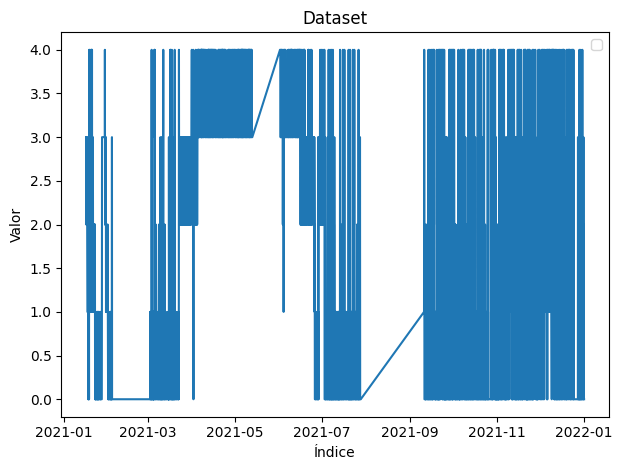

In [157]:
bd.index = pd.to_datetime(bd["record_date"], format="%Y-%m-%d %H:%M:00")
plt.title('Dataset')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
serie(bd,"incidents")
newBd = bd[["incidents","record_date"]]
bd.pop("record_date")
escala, bd = data_normalization(bd, norm_range=(-1, 1))

                     magnitude_of_delay  delay_in_seconds  luminosity  \
record_date                                                             
2021-01-16 16:00:00                -1.0         -0.995818        -1.0   
2021-01-16 17:00:00                -1.0         -0.997909         0.0   
2021-01-16 18:00:00                -1.0         -1.000000         1.0   
2021-01-16 19:00:00                -1.0         -1.000000         1.0   
2021-01-16 20:00:00                -1.0         -1.000000         1.0   
...                                 ...               ...         ...   
2021-12-31 19:00:00                -1.0         -0.678281         1.0   
2021-12-31 20:00:00                -1.0         -1.000000         1.0   
2021-12-31 21:00:00                -1.0         -1.000000         1.0   
2021-12-31 22:00:00                -1.0         -1.000000         1.0   
2021-12-31 23:00:00                -1.0         -1.000000         1.0   

                     avg_temperature  avg_atm_pres

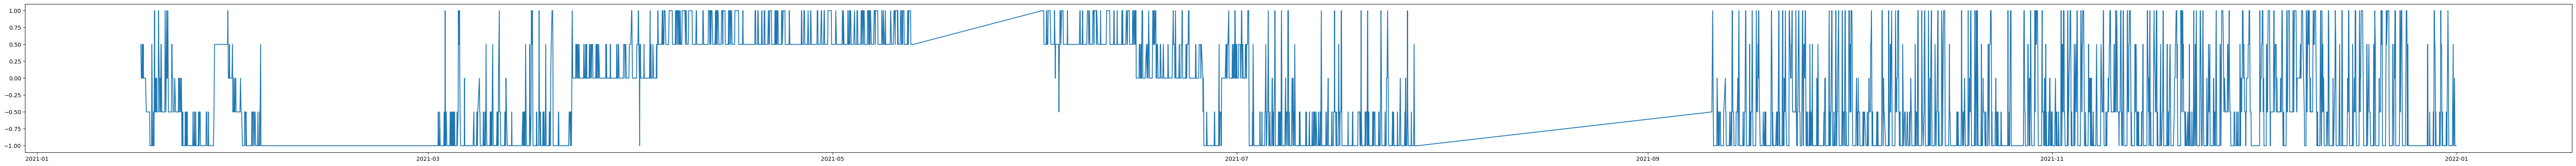

record_date
2021-01-16 16:00:00    0.50
2021-01-16 17:00:00    0.25
2021-01-16 18:00:00    0.00
2021-01-16 19:00:00    0.00
2021-01-16 20:00:00    0.00
                       ... 
2021-12-31 19:00:00   -1.00
2021-12-31 20:00:00   -1.00
2021-12-31 21:00:00   -1.00
2021-12-31 22:00:00   -1.00
2021-12-31 23:00:00   -1.00
Name: incidents, Length: 7640, dtype: float64


In [158]:
temp = bd
temp = temp.resample("H").interpolate(method="time")
temp =temp[temp.index.month !=8]
print(temp)
fig=plt.figure()
plt.plot(temp["incidents"])
spacing =10
fig.subplots_adjust(right=spacing)
plt.show()
print(temp["incidents"])

In [159]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i + window_size]
        X.append(row)
        label = df_as_np[i + window_size][8]  # Última coluna contém a variável de destino (incidentes)
        y.append(label)
    return np.array(X), np.array(y)

In [160]:
WINDOW_SIZE = 48
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((7592, 48, 13), (7592,))

In [161]:
X_train1, y_train1 = X1[:6000], y1[:6000]
X_val1, y_val1 = X1[6000:7000], y1[6000:7000]
X_test1, y_test1 = X1[7000:], y1[7000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6000, 48, 13), (6000,), (1000, 48, 13), (1000,), (592, 48, 13), (592,))

Construção do modelo com uma LSTM

In [162]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((48, 13)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19968     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20,497
Trainable params: 20,497
Non-trainable params: 0
_________________________________________________________________


In [163]:
cp1 = ModelCheckpoint('modelKaggleLSTM/modelo.h5', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [164]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
188/188 [==============================] - 4s 14ms/step - loss: 0.2995 - root_mean_squared_error: 0.5473 - val_loss: 0.3825 - val_root_mean_squared_error: 0.6184
Epoch 2/100
188/188 [==============================] - 2s 12ms/step - loss: 0.1194 - root_mean_squared_error: 0.3455 - val_loss: 0.3225 - val_root_mean_squared_error: 0.5679
Epoch 3/100
188/188 [==============================] - 2s 12ms/step - loss: 0.1058 - root_mean_squared_error: 0.3253 - val_loss: 0.2971 - val_root_mean_squared_error: 0.5451
Epoch 4/100
188/188 [==============================] - 2s 12ms/step - loss: 0.1002 - root_mean_squared_error: 0.3166 - val_loss: 0.2846 - val_root_mean_squared_error: 0.5335
Epoch 5/100
188/188 [==============================] - 2s 12ms/step - loss: 0.0956 - root_mean_squared_error: 0.3092 - val_loss: 0.2722 - val_root_mean_squared_error: 0.5217
Epoch 6/100
188/188 [==============================] - 3s 14ms/step - loss: 0.0928 - root_mean_squared_error: 0.3046 - val_loss: 0

In [165]:
from tensorflow.keras.models import load_model
model1 = load_model('modelKaggleLSTM/modelo.h5')

In [166]:
train_predictions = model1.predict(X_train1).flatten()
escala_predictions = MinMaxScaler()
escala_actuals = MinMaxScaler()

escala_predictions.fit(train_predictions.reshape(-1, 1))
escala_actuals.fit(y_train1.reshape(-1, 1))

train_predictions_unscaled = escala_predictions.inverse_transform(train_predictions.reshape(-1, 1))
y_train1_unscaled = escala_actuals.inverse_transform(y_train1.reshape(-1, 1))
train_predictions_unscaled += 3
y_train1_unscaled += 3
train_results = pd.DataFrame(data={'Train Predictions': train_predictions_unscaled.flatten(), 'Actuals': y_train1_unscaled.flatten()})
train_results

188/188 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,1.174207,0.0
1,1.320017,3.0
2,2.541735,4.0
3,2.773674,1.0
4,0.352323,2.0
...,...,...
5995,0.293130,0.0
5996,0.227051,0.0
5997,0.148848,0.0
5998,0.072946,0.0


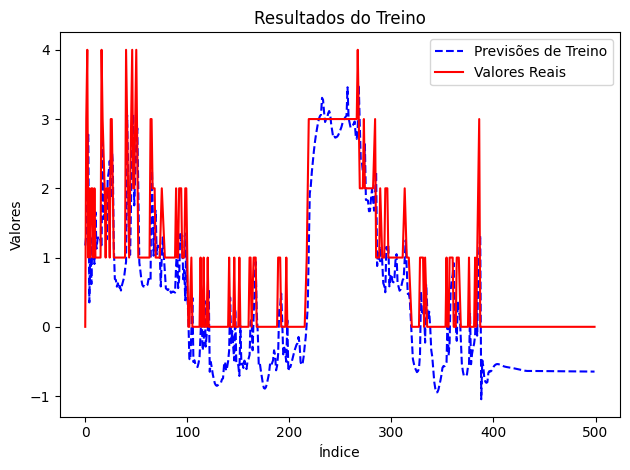

In [167]:
import matplotlib.pyplot as plt
plt.title('Resultados do Treino')
plt.xlabel('Índice')
plt.ylabel('Valores')

plt.plot(train_results['Train Predictions'][:500], color='blue', linestyle='--', label='Previsões de Treino')
plt.plot(train_results['Actuals'][:500], color='red', linestyle='-', label='Valores Reais')

plt.legend()
plt.tight_layout()
plt.show()


In [168]:
val_predictions = model1.predict(X_val1).flatten()
escala_predictions = MinMaxScaler()
escala_actuals = MinMaxScaler()

escala_predictions.fit(val_predictions.reshape(-1, 1))
escala_actuals.fit(y_val1.reshape(-1, 1))

val_predictions_unscaled = escala_predictions.inverse_transform(val_predictions.reshape(-1, 1))
y_val1_unscaled = escala_actuals.inverse_transform(y_val1.reshape(-1, 1))
val_predictions_unscaled += 3
y_val1_unscaled += 3
val_results = pd.DataFrame(data={'Val Predictions': val_predictions_unscaled.flatten(), 'Actuals': y_val1_unscaled.flatten()})
val_results

32/32 [==============================] - 0s 4ms/step


,Val Predictions,Actuals
0,0.224969,0.0
1,0.170655,0.0
2,0.125307,0.0
3,0.089796,0.0
4,0.058462,0.0
...,...,...
995,0.734125,1.0
996,0.747381,1.0
997,0.772098,1.0
998,0.782421,1.0


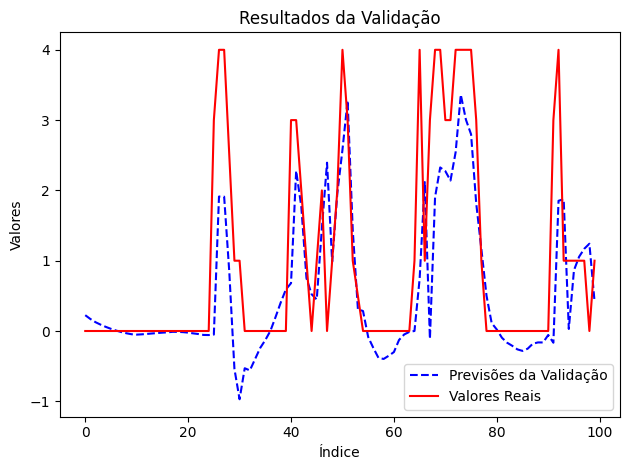

In [169]:
import matplotlib.pyplot as plt

plt.title('Resultados da Validação')
plt.xlabel('Índice')
plt.ylabel('Valores')

plt.plot(val_results['Val Predictions'][:100], color='blue', linestyle='--', label='Previsões da Validação')
plt.plot(val_results['Actuals'][:100], color='red', linestyle='-', label='Valores Reais')

plt.legend()
plt.tight_layout()
plt.show()


In [170]:
test_predictions = model1.predict(X_test1).flatten()
escala_predictions = MinMaxScaler()
escala_actuals = MinMaxScaler()

escala_predictions.fit(test_predictions.reshape(-1, 1))
escala_actuals.fit(y_test1.reshape(-1, 1))

test_predictions_unscaled = escala_predictions.inverse_transform(test_predictions.reshape(-1, 1))
y_test1_unscaled = escala_actuals.inverse_transform(y_test1.reshape(-1, 1))
test_predictions_unscaled += 3
y_test1_unscaled += 3
test_results = pd.DataFrame(data={'Test Predictions': test_predictions_unscaled.flatten(), 'Actuals': y_test1_unscaled.flatten()})
test_results


19/19 [==============================] - 0s 5ms/step


,Test Predictions,Actuals
0,0.921266,4.0
1,3.020434,4.0
2,2.074935,3.0
3,1.105569,1.0
4,0.660005,3.0
...,...,...
587,-0.178429,0.0
588,0.093833,0.0
589,0.043862,0.0
590,0.055840,0.0


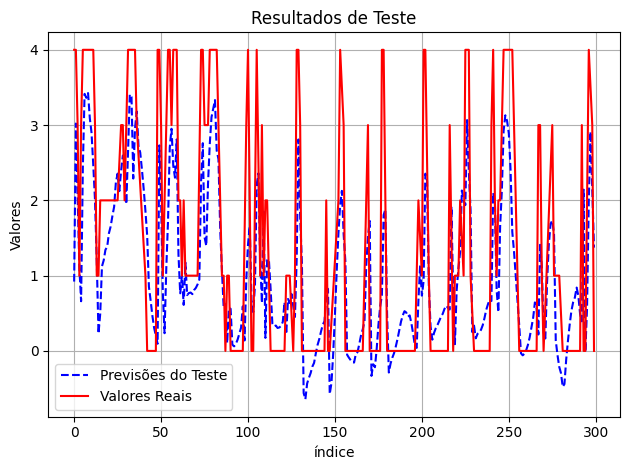

In [171]:
import matplotlib.pyplot as plt

plt.title('Resultados de Teste')
plt.xlabel('índice')
plt.ylabel('Valores')

plt.plot(test_results['Test Predictions'][:300], color='blue', linestyle='--', label='Previsões do Teste')
plt.plot(test_results['Actuals'][:300], color='red', linestyle='-', label='Valores Reais')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [200]:
def forecast(model, df, timesteps, multisteps):
    input_seq = df[-timesteps:].values #getting the last sequence of known value
    inp = input_seq
    predictions = list()
    for _ in range(1, multisteps+1):
        inp = inp.reshape(1, timesteps, 13)
        yhat = model.predict(inp)
        predictions.append(yhat[0][8])
        #prepare new input to forecast the next day
        inp = np.append(inp[0], yhat)
        inp = inp[-timesteps:]
    return predictions

In [173]:
def plot_forecast(data, forecasts):
    plt.figure(figsize=(8,6))
    plt.plot(range(len(data)), data, color='green', label='Confirmed')
    plt.plot(range(len(data)-1, len(data)+len(forecasts)-1), forecasts, color='red', label='Forecasts')
    plt.title('Number of incidents')
    plt.ylabel('Incidents')
    plt.xlabel('Days')
    plt.legend()
    plt.show() 


In [201]:
futuro = forecast(model1,temp,168,24)

1/1 [==============================] - 0s 20ms/step


IndexError: invalid index to scalar variable.